# Introdução = descrição e atributos

Flight delays<br><br>


According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. 


But, what are the causes for these delays?

In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008 and their causes for delay, diversion and cancellation; if any.

The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).<br><br>
The results are tentative.<br><br>
This dataset is composed by the following variables:<br><br>

Year 2008<br><br>
Month 1-12<br><br>
DayofMonth 1-31<br><br>
DayOfWeek 1 (Monday) - 7 (Sunday)<br><br>
DepTime actual departure time (local, hhmm)<br><br>
CRSDepTime scheduled departure time (local, hhmm)<br><br>
ArrTime actual arrival time (local, hhmm)<br><br>
CRSArrTime scheduled arrival time (local, hhmm)<br><br>
UniqueCarrier unique carrier code<br><br>
FlightNum flight number<br><br>
TailNum plane tail number: aircraft registration, unique aircraft identifier<br><br>
ActualElapsedTime in minutes<br><br>
CRSElapsedTime in minutes<br><br>
AirTime in minutes<br><br>
ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).<br><br>
DepDelay departure delay, in minutes<br><br>
Origin origin IATA airport code<br><br>
Dest destination IATA airport code<br><br>
Distance in miles<br><br>
TaxiIn taxi in time, in minutes<br><br>
TaxiOut taxi out time in minutes<br><br>
Cancelled *was the flight cancelled<br><br>

CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br><br>

Diverted 1 = yes, 0 = no<br><br>

CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.<br><br>

WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.<br><br>

NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.<br><br>

SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.<br><br>


LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.<br><br><br>


# Leia os delayed flights

In [20]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm


pd.options.display.float_format = '{:.0f}'.format

In [21]:
# Reading and showing head data
import os

os.chdir('C:\\Users\\guibs\\Desktop\\lab7_delayedflights')

flights = pd.read_csv("DelayedFlights.csv")
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


# Quais as principais correlacoes? Como conclui isso pela matriz?
    Distance is Related with Elapsed Time, CRS Time e Air Time  mas nao nos dizem nada de muito importante
    Arrival delay esta relacionado com o carrier delay e com late arrival delay, significa que estao fortemente relacionados pelos atrasos pela companhia ex: problema num aviao causa problemas nos voos seguintes.


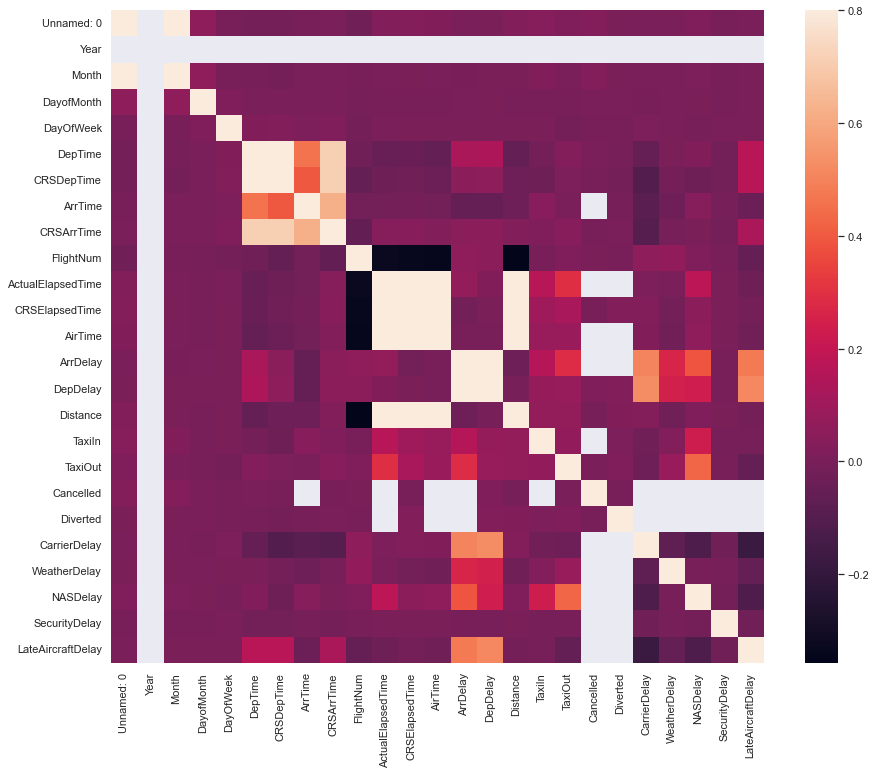

In [22]:
#correlation matrix
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

# Pre-processamentos

In [23]:
# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['ArrDelay'] <= 15, 'Status'] = 0
    flights.loc[flights['ArrDelay'] >= 15, 'Status'] = 1
    flights.loc[flights['ArrDelay'] >= 60, 'Status'] = 2
    flights.loc[flights['Diverted'] == 1, 'Status'] = 3
    flights.loc[flights['Cancelled'] == 1, 'Status'] = 4
    
 
for dataset in flights:
    flights.loc[flights['ArrDelay'] <= 15, 'StatusLabel'] = '<= 15'
    flights.loc[flights['ArrDelay'] >= 15, 'StatusLabel'] = '>= 15'
    flights.loc[flights['ArrDelay'] >= 60, 'StatusLabel'] = '>= 60'
    flights.loc[flights['Diverted'] == 1, 'StatusLabel'] = 'Divert'
    flights.loc[flights['Cancelled'] == 1, 'StatusLabel'] = 'Cancel'

#Cancellation cause
flights.loc[flights["CancellationCode"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CancellationCode"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CancellationCode"] =="C", 'CancellationCode'] = "2"

# dropping the unwanted data  
flights = flights.drop("Unnamed: 0",1) #Empty
flights = flights.drop("Year",1) #Converted to date
flights = flights.drop("DayofMonth",1) #Converted to date
flights = flights.drop("DepTime",1) #Of the departure data we only keep the expected 
flights = flights.drop("DepDelay",1)
flights = flights.drop("ArrTime",1)
flights = flights.drop("CRSArrTime",1)
flights = flights.drop("ActualElapsedTime",1)
flights = flights.drop("CRSElapsedTime",1)
flights = flights.drop("Diverted",1)
flights = flights.drop("Cancelled",1)
flights = flights.drop("Distance",1)
flights = flights.drop("FlightNum",1)
flights = flights.drop("TailNum",1)

C:\Users\guibs\AppData\Local\Temp\ipykernel_8488\2589790458.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("Unnamed: 0",1) #Empty
C:\Users\guibs\AppData\Local\Temp\ipykernel_8488\2589790458.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("Year",1) #Converted to date
C:\Users\guibs\AppData\Local\Temp\ipykernel_8488\2589790458.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("DayofMonth",1) #Converted to date
C:\Users\guibs\AppData\Local\Temp\ipykernel_8488\2589790458.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("DepTime",1) #Of 

In [24]:
flights.head()

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,Status,StatusLabel
0,1,4,1955,WN,116,-14,IAD,TPA,4,8,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0,<= 15
1,1,4,735,WN,113,2,IAD,TPA,5,10,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0,<= 15
2,1,4,620,WN,76,14,IND,BWI,3,17,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0,<= 15
3,1,4,1755,WN,77,34,IND,BWI,3,10,N,2,0,0,0,32,2008-01-03,1,>= 15
4,1,4,1915,WN,87,11,IND,JAX,4,10,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0,<= 15


# Como se dividem os voos em termos de atrasos (%) nesse ano?
Maior parte dos atrasos sao pequenos, sendo uma pequena parte maiores, no total do voos maior parte deles teve pelo menos um tipo de atraso (~60% dos voos teve atrasos)

C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


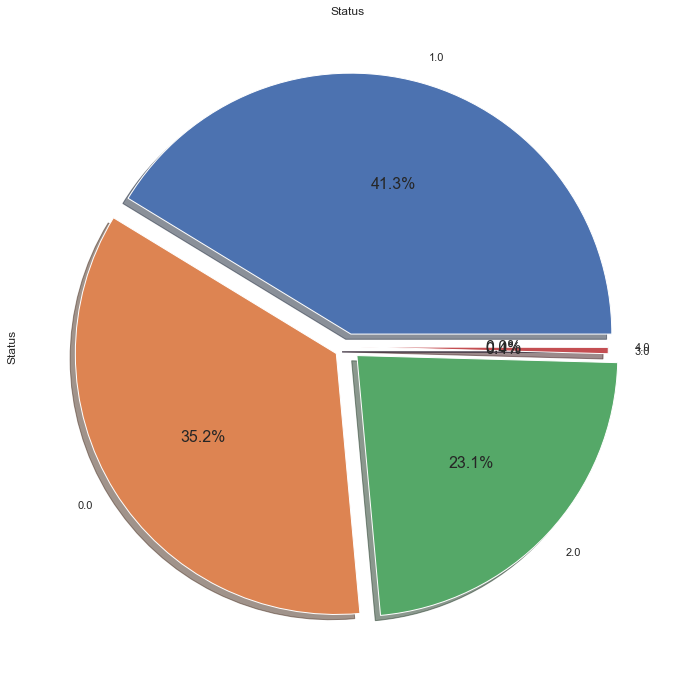

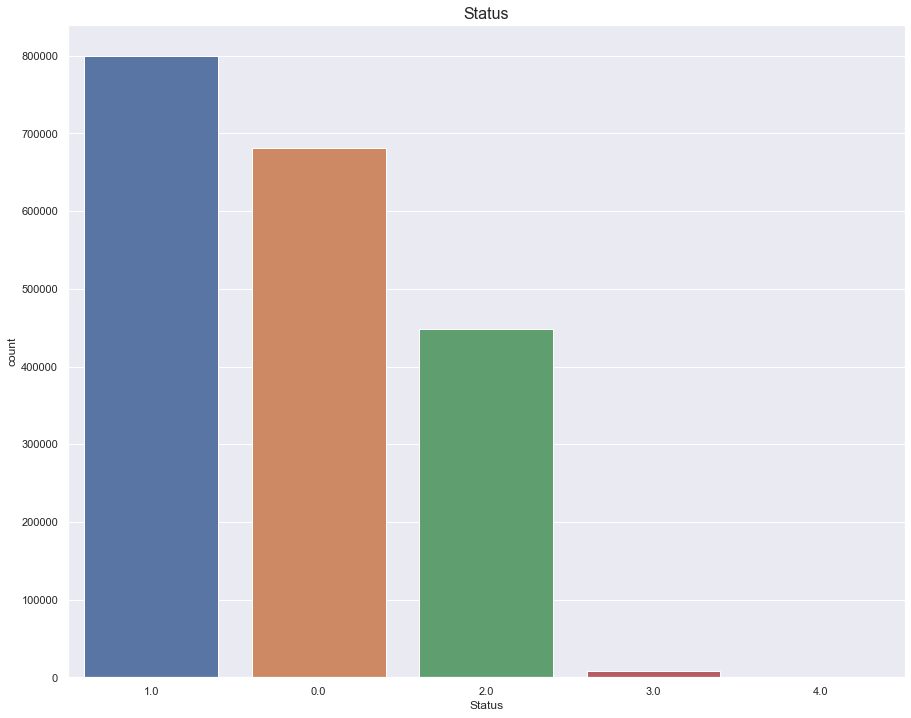

In [25]:
plt.rcParams['font.size'] = '16'

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

f, ax = plt.subplots(figsize=(15, 12))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Status')


f, ax = plt.subplots(figsize=(15, 12))
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax)
ax.set_title('Status', fontsize=16)
plt.show()




# Como é que se dividiram os cancelamentos relativamente a causas destes, e o que é o NAS?
Carrier principal, em segundo o weather e por fim o National Airport Security


0 = carrier, 1 = weather, 2 = NAS


C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


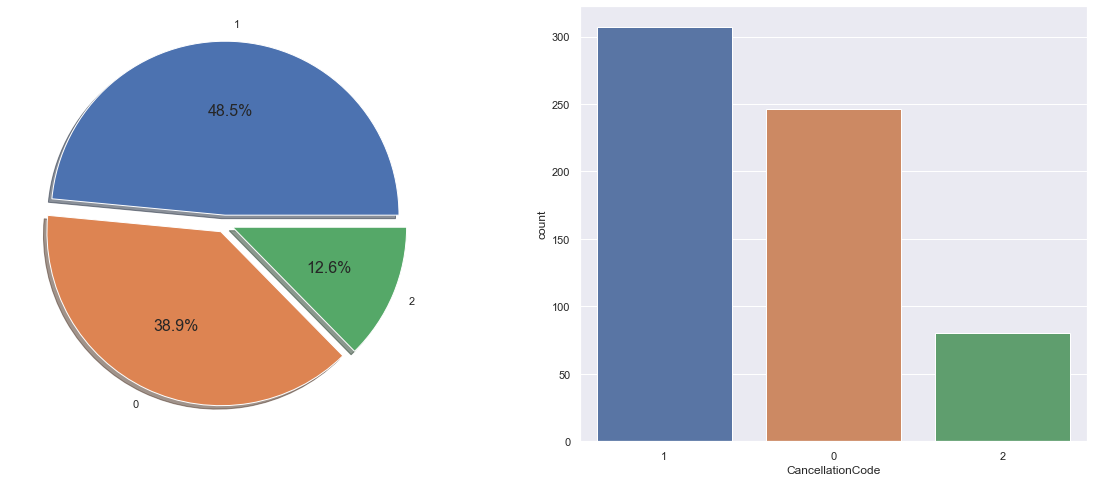

In [26]:

print('0 = carrier, 1 = weather, 2 = NAS')

CancFlights = flights[(flights.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = CancFlights['CancellationCode'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()



# Como se dividiram os cancelamentos ao longo do ano? Porque será assim?
Sao maiores no inverdo, presumidamente devido ao tempo.

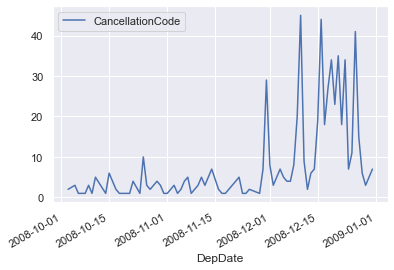

In [27]:


CancFlights[['DepDate','CancellationCode']].groupby(['DepDate']).count().plot()

plt.show()

# Como se distribuiram os atrasos nas chegadas em tempo de atraso?
maior quantidade de pessoas e voos maior atrasos

C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


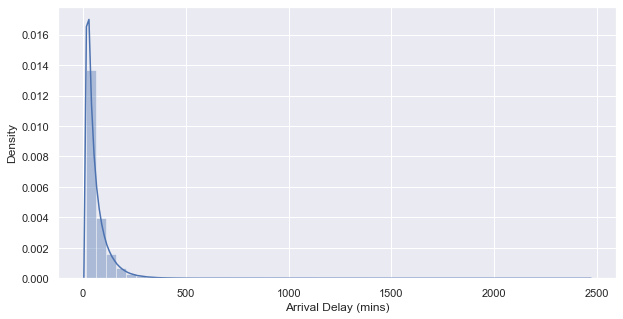

In [28]:
plt.figure(figsize=(10, 5))
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]
#histogram
sns.distplot(Delayedflights['ArrDelay'])
plt.xlabel('Arrival Delay (mins)')
plt.show()

In [29]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ArrDelay'].skew())
print("Kurtosis: %f" % Delayedflights['ArrDelay'].kurt())

Skewness: 4.059856
Kurtosis: 40.381941


Skewness = assimetria:<br><br>
Mede a assimetria das caudas da distribuição. Distribuições assimétricas que tem uma cauda mais "pesada" que a outra apresentam assimetria. Distribuições simétricas tem assimetria zero. Assim:<br><br>

Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada<br><br>
Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada<br><br>
Se v=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).<br><br>

Kurtosis=Curtose<br><br>
A curtose é uma medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade em relação à normal<br><br>

Se o valor da curtose for = 0 (ou 3, pela segunda definição), então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas<br><br>

Se o valor é > 0 (ou > 3), então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)<br><br>

Se o valor é < 0 (ou < 3), então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica


# Em que alturas houve mais atrasos e maiores atrasos?
Nos meses de janeiro, Agosto e Dezembro existe mais fluxo de pessoas logo existem mais atrasos e os atrasos sao maiores

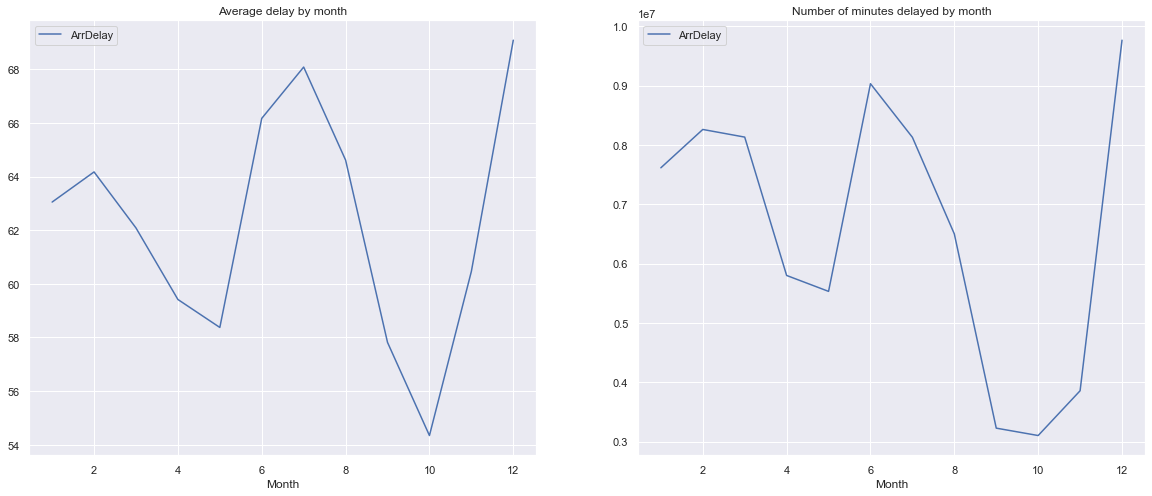

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

# O que aprendemos atraves do grafico que se obtem da computacao seguinte?
Entre as 12 e as 13 horas bem como entre as 18 e as 20h e quando existe maiores atrasos

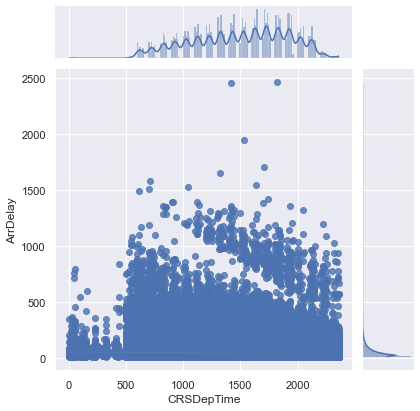

In [31]:
sns.jointplot(x='CRSDepTime',y='ArrDelay',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

# Olhando para a seguinte matriz de correlacao, quais as correlações mais importantes de atrasos e como explica isso?
Arrive delay com o Carrier delay e com o lateaircraft delay e o NASDelay com o TaxiOut devido a questoes de seguranca podem demorar mais tempo em pista

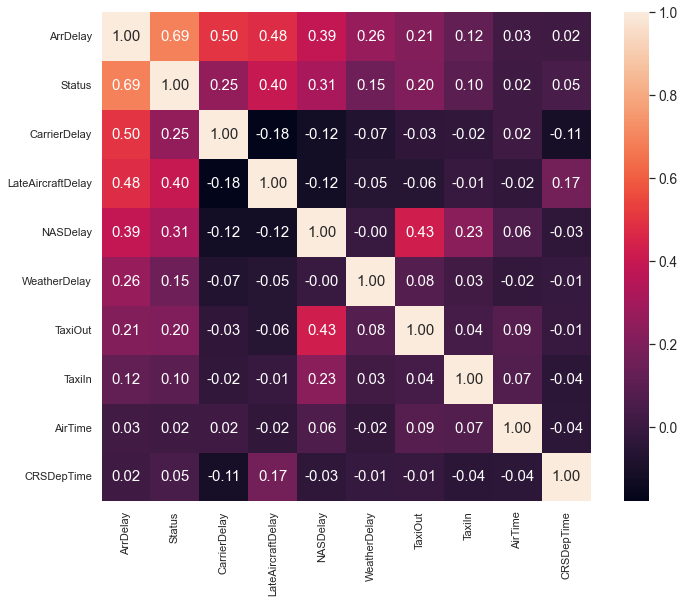

In [32]:
# verificar a correlacao do status com os tipos de delay:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# O que conclui da leitura do grafico seguinte relativamente a causas de atrasos?
O LateAircraft Delay e O que causa mais delays, seguido de CarrierDelay,NASDelay e com menos relevancia o WeatherDelay e a securityDelay

C:\Users\guibs\AppData\Local\Temp\ipykernel_8488\3129500917.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


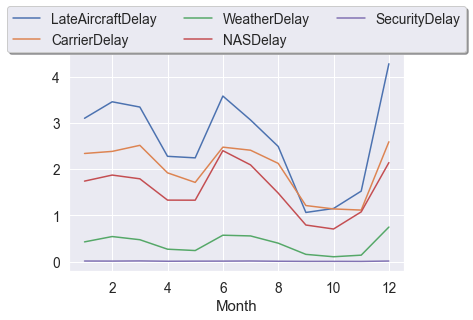

In [33]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

# O seguinte é so para conhecimento

C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


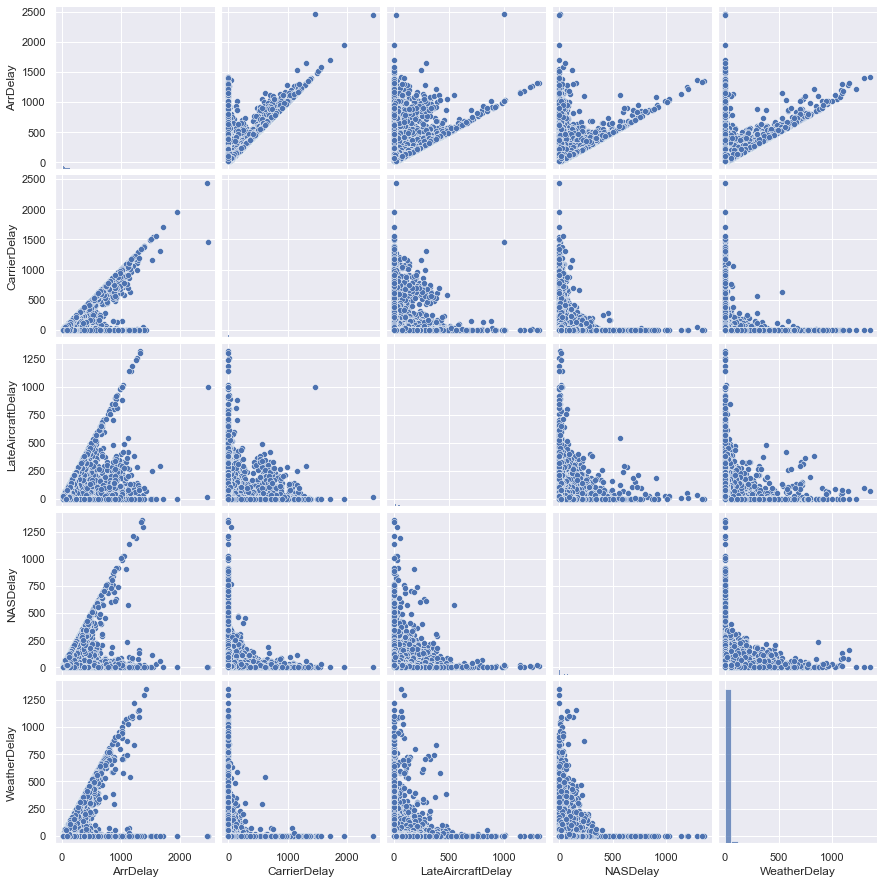

In [34]:
#scatterplot
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

2.2.1 Late Aircraft Delay

# Quais as tres companhias aéreas com mais atrasos? E o que nos diz o gráfico da direita? Quais as companhias que devem ser o foco da analise por terem mais atrasos em geral do que as restantes? Sera culpa da companhia, ou podera haver outros factores?

    1.Mesa Airlines
    2.Hawaiian Airlines
    3.Atlhantic Southwest Airlines
    
   Grafico da direita da a distribuicao dos delays
   
   Podem haver outros fatores, mas parcialmente a culpa e da companhia.

In [35]:
print(flights['UniqueCarrier'].value_counts())

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64


C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


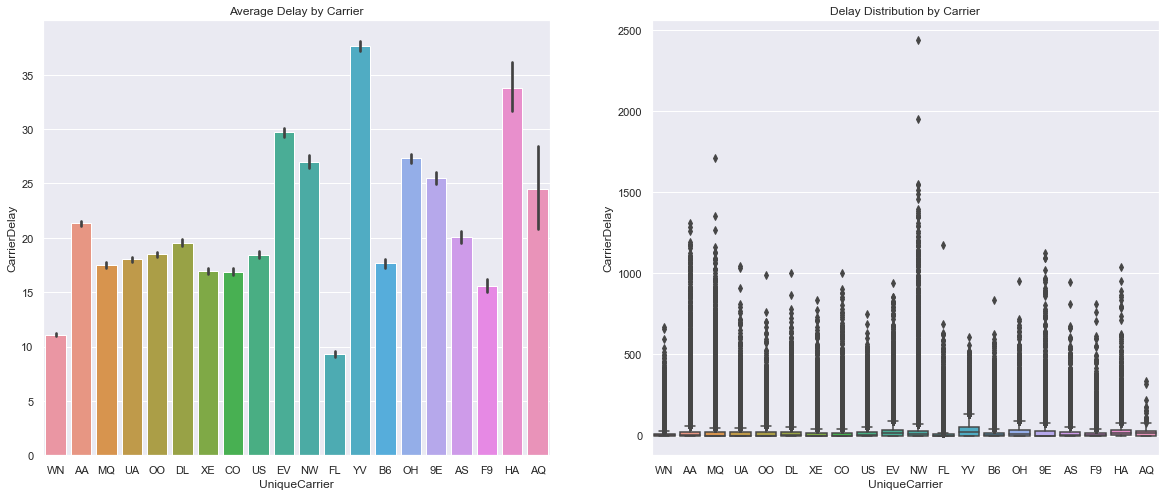

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

# Quais os 3 aeroportos com mais atrasos? E qual teve o maior atraso de todos?
Boston, JFK, CLT. o Que teve maior foi denver.

In [37]:
#Having more than 300 airports on the dataset, we are going to focus on the top20. 
Top20airports = Delayedflights[(Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'ATL') |
                               (Delayedflights.Origin == 'DFW') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'EWR') | (Delayedflights.Origin == 'LAX') | 
                               (Delayedflights.Origin == 'IAH') | (Delayedflights.Origin == 'PHX') |
                               (Delayedflights.Origin == 'DTW') | (Delayedflights.Origin == 'SFO') | 
                               (Delayedflights.Origin == 'LAS') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'JFK') | 
                               (Delayedflights.Origin == 'CLT') | (Delayedflights.Origin == 'LGA') |
                               (Delayedflights.Origin == 'MCO') | (Delayedflights.Origin == 'MSP') | 
                               (Delayedflights.Origin == 'BOS') | (Delayedflights.Origin == 'PHL')]

print(Top20airports['Origin'].value_counts())

ORD    90611
ATL    87741
DFW    62073
DEN    46477
EWR    36115
LAX    33713
IAH    33166
PHX    31002
DTW    30732
SFO    30110
LAS    30041
JFK    23870
CLT    23318
LGA    22807
MCO    22290
MSP    22149
BOS    19816
PHL    19302
Name: Origin, dtype: int64


C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guibs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


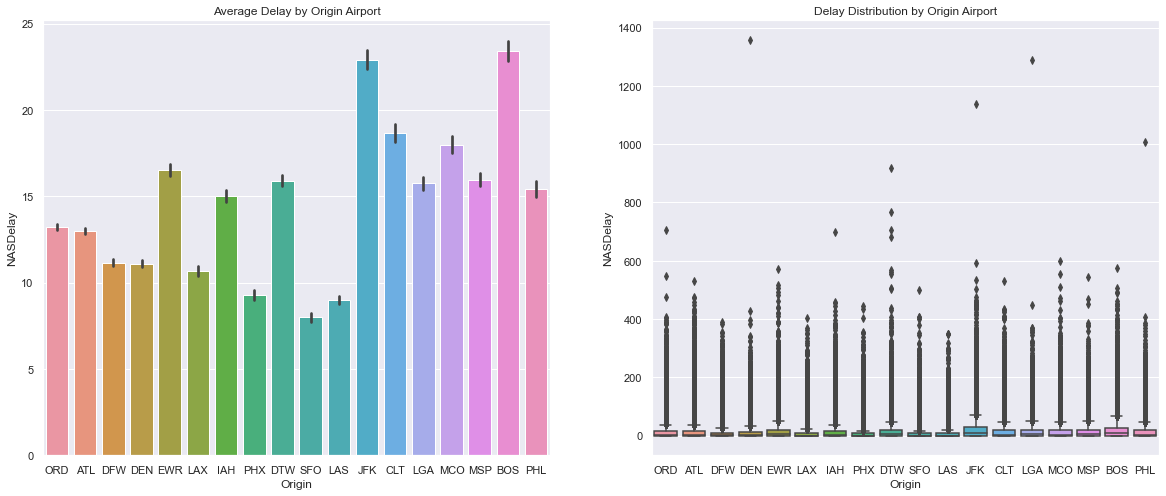

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit', 'SFO: San Francisco', 'LAS: Las Vegas', 'JFK: New York', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'MCO: Orlando', 'MSP: Minneapolis', 'BOS Boston', 'PHL Philadelphia']


In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Origin','NASDelay', data=Top20airports,ax=ax[0], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('Origin','NASDelay', data=Top20airports,ax=ax[1], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit','SFO: San Francisco','LAS: Las Vegas','JFK: New York','CLT: Charlotte',
       'LGA: La Guardia (NY)','MCO: Orlando','MSP: Minneapolis','BOS Boston','PHL Philadelphia'])

# CONCLUSOES, para curiosidade que pode ler depois : The situation today

So far, we have seen causes for flight delay in 2008, but has the situation changed since then? 8 years later, in 2016, the ratio of domestic fligths in the US data offers a much brighter present. Numbers can be checked here.<br><br>
Making a comparison between then and now, we can see how the numbers have improved (*):<br><br>
On time: 35,2% in 2008 vs 81,42% in 2016.<br><br>
Delayed: 64,4% in 2008 vs 17,17% in 2016.<br><br>
Cancelled: 0,03% in 2008 vs 1,17% in 2016.<br><br>
Diverted: 0,4% in 2008 vs 0,24% in 2016.<br><br>
(*) After searching for the reason behind this significant improvement in the last 8 years, we have compared the data offered on the BTS website for 2008 and 2016 and our dataset. The BTS ratios are based on datasets containing the averages by air carrier and origin airport, and they don't compare individual flights. Their sample consider nearly 20.000 flights. Our dataset, in comparison, contains around 2 million individual flights.
The BTS data for 2008 is 76,04% flights on time, 21,75% delayed, 1,96% cancelled and 0,25% diverted. Taking into account these ratios, in the period between 2008 and 2016, there has been a 7% increase in the number of flights on time, an average of 0.875% each year. However, there's still a lot of room for improvement

4. A glimpse into the future
While the dataset itself doesn't offer a solution to the delay issue, it's clear that delay reduction has many intertwined variables. A solution applicable to one type of delay will heavily affect the others, resulting in a compounded effect that will allow more efficient operations; benefiting passengers, airports, carriers and even the world as a whole.
Here are some of the solutions to be seen on the near future:
5.1 LateAircraft and NAS Delay
Some experts, like Michael Baiada (retired pilot and President of ATH Group), argues that the solution to NAS Delay lies within the carriers. If carriers allowed aircrafts a higher speed and fuel consumption on planes that departed late, the effect wouldn't spread along the flight chain. This would decrease the NAS Delay itself and the Late Aircraft Delay, decreasing significatively the number of planes delayed.
Find the full article here:
5.2 Better information efficiency
Amadeus, top GDS (Global Distribution Systems) and IT solutions provider to the travel industry identifies the approaches that Airlines, IT solutions and Big Data are taking in order to solve this issue. There's a paper on the issue in the following link.